# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [71]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [72]:
import re

In [73]:
def get_city_info(city_coordination):
    city_location = {} 
    for line in city_coordination.split("\n"):
        if line.startswith("//"): 
            continue
        if line.strip() == "":
            continue  
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        
        city_location[city] = x_y
    return city_location

In [74]:
city_info = get_city_info(coordination_source)

In [75]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [76]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [77]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("杭州","上海")

153.5185697155768

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [79]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [80]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_info.keys()))

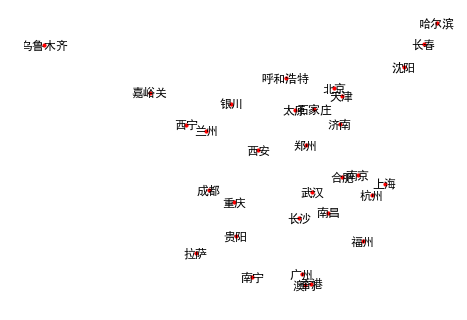

In [81]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [82]:
threshold = 700   # defined the threshold

In [83]:
from collections import defaultdict

In [84]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)

In [85]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [86]:
cities_connection_graph = nx.Graph(cities_connection)

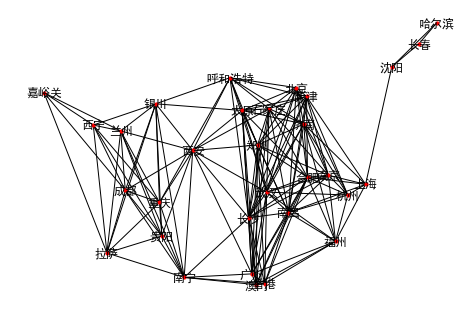

In [87]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

In [88]:
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [89]:
search_1(cities_connection,"上海","香港")

['上海', '合肥', '香港']

In [90]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [91]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [92]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [93]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

## Machine Learning

In [95]:
from sklearn.datasets import load_boston
import random

dataset = load_boston()
x,y=dataset['data'],dataset['target']
x.shape

(506, 13)

In [96]:
y.shape

(506,)

In [97]:
x[1].shape
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [98]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [99]:
dataset['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [100]:
X_rm = x[:,5]

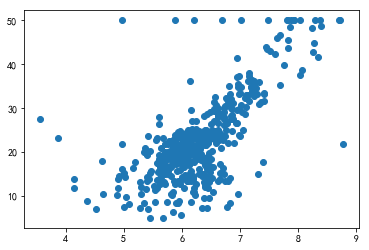

In [101]:
plt.scatter(X_rm,y)

In [102]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [103]:
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [104]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [105]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 1588.6950122855405, parameters k is 2.5787035325367356 and b is -32.71348332096076
Iteration 1, the loss is 1345.8339274248233, parameters k is 3.075836901780758 and b is -32.635403159461355
Iteration 2, the loss is 1141.148818596184, parameters k is 3.53222880514572 and b is -32.563727761219845
Iteration 3, the loss is 968.6387030693294, parameters k is 3.951218193229786 and b is -32.49793222627481
Iteration 4, the loss is 823.2459084748886, parameters k is 4.335870374263847 and b is -32.437534672632246
Iteration 5, the loss is 700.7077913516927, parameters k is 4.6889994403628155 and b is -32.382092710745155
Iteration 6, the loss is 597.4317644481282, parameters k is 5.0131888558424125 and b is -32.3312002069258
Iteration 7, the loss is 510.3899688128052, parameters k is 5.310810358228659 and b is -32.28448431201116
Iteration 8, the loss is 437.0305026581283, parameters k is 5.584041310242652 and b is -32.24160273354297
Iteration 9, the loss is 375.2026043937

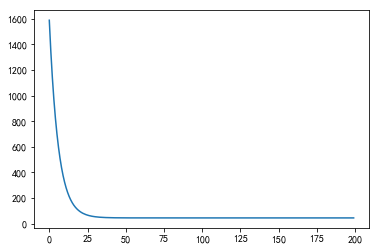

In [106]:
plt.plot(list(range(iteration_num)),losses)

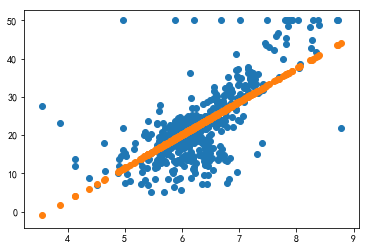

In [107]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

1.当两个点之间的cost是大于等于零时；
2.在每一次迭代中，对搜索路径的cost排序

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

正常情况下不认为DFS存在最优解，因为DFS搜索每条路都会一条路走到底，很多情况下目标不会出现出现在第一个开始搜索的路径中。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

问题需要最优解的时候使用BFS；如果不需要，看空间复杂度的需要，如果可用内存小，用DFS；如果可用内存大，用BFS。

##### 2.4 When can we use machine learning ?

语音助理（自然语言处理）、人脸识别（计算机视觉）、自动驾驶等等。

##### 2.5 What is the gradient of a function ?

计算一个模型损失函数的最小值，来得到最小化的损失函数和模型参数值

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

可用梯度上升法来迭代

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
import pandas
from bs4 import BeautifulSoup 
from urllib import request
import re
import pandas as pd
import numpy as np
import urllib.parse as urp
from xml.etree import ElementTree
import time

def get_location1__(name,city):  
        my_ak = '5iTvRj1yBXtRljh2p1BNZ1NdVU7Tc9V5'    # 需要自己填写自己的AK
        tag = urp.quote('地铁站')
        qurey = urp.quote(name)
        try:
            url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
            req = request.urlopen(url)
            res = req.read().decode()
            lat = pd.to_numeric(re.findall('"lat":(.*)',res)[0].split(',')[0])
            lng = pd.to_numeric(re.findall('"lng":(.*)',res)[0])
            lat_2 = round(lat,2)
            lng_2 = round(lng,2)
            return (lng_2,lat_2)  #经度和纬度
        except:
            return 0,0

In [2]:
import requests

url = 'https://www.bjsubway.com/e/action/ListInfo/?classid=40&ph=1&station=%C6%BB%B9%FB%D4%B0'
strhtml = requests.get(url)
print (strhtml.content.decode('gb2312'))

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />
<title>服务设施 | 北京地铁官方网站</title>
<meta name="keywords" content="北京地铁官方网站,服务设施" />
<meta name="description" content="可以查询站点内的服务设施，包括自动取款机，自动售票机，自动售货机等等服务设施的信息，为您的出行带来更好的体验。" />
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link href="/subway/css/common.css" rel="stylesheet" type="text/css" />
<link href="/subway/css/search1.css" rel="stylesheet" type="text/css" />
<script type="text/javascript" src="/subway/js/jquery.js"></script>
<script type="text/javascript" src="/subway/js/around.js"></script>
<script type="text/javascript">
var curline='';$(function(){
var curstation = $.trim($(".line_station").text());
$(".line_content").find("li").each(function(){
if ($(this).text() == curstation)
{
$(this).find("a").css("color","red")

In [3]:
file = open ('subway.html','w')
file.write(strhtml.content.decode('gb2312'))
file.close()

In [4]:
file = open('subway.html','r')
html = file.read()
file.close()

soup = BeautifulSoup(html,'html.parser')
print (soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>服务设施 | 北京地铁官方网站</title>
<meta content="北京地铁官方网站,服务设施" name="keywords"/>
<meta content="可以查询站点内的服务设施，包括自动取款机，自动售票机，自动售货机等等服务设施的信息，为您的出行带来更好的体验。" name="description"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/subway/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/subway/css/search1.css" rel="stylesheet" type="text/css"/>
<script src="/subway/js/jquery.js" type="text/javascript"></script>
<script src="/subway/js/around.js" type="text/javascript"></script>
<script type="text/javascript">

var curline='';$(function(){

var curstation = $.trim($(".line_station").text());

$(".line_content").find("li").each(function(){

if ($(this).text() == curstation)

{

$(this).find("a").css("color","red")

### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

获取各个地铁站经纬度并存在字典中

In [5]:
def get_subway_info():
    subway_info = {}
    all_station = soup.select('a[href*=/e/action/ListInfo]')
    for data in all_station:
        each_station = data.get_text()
        x_y = get_location1__(each_station,'北京')
        x_y = tuple(x_y)
        subway_info[each_station] = x_y
    return subway_info

In [6]:
subway_info = get_subway_info()

In [8]:
subway_info.keys()

dict_keys(['首末车时间', '服务设施', '无障碍服务设施', '一卡通服务网点', '苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '阜成门', '车公庄', '宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '灯市口', '东四', '张自忠路', '北新桥', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北', '金安桥', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '平安里', '北海北', '南锣鼓巷', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '广渠门内', '广渠门外', '双井', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合', '焦化厂', '黄厂', '郎辛庄', '黑庄户', '万盛西', '万盛东', '群芳', '高楼金', '花庄', '朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北

#### 计算站点距离

In [7]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return (round(d,2))

In [8]:
def get_city_distance(city1,city2):
    return geo_distance(subway_info[city1],subway_info[city2])


#### Draw the graph

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

#%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#### 获取地铁各个线路的站点信息及经纬度

In [10]:
threshold = 4   # defined the threshold

In [11]:
from collections import defaultdict

In [12]:
def get_line1_info():
    station_line1 = {}
    line1_station =  soup.select('a[href*="1号线"]')
    for item in line1_station:
        each_station1 = item.get_text()
        x_y = get_location1__(each_station1,'北京')
        x_y = tuple(x_y)
        station_line1[each_station1] = x_y
    return station_line1
line1_info = get_line1_info()
line1_info['苹果园'] = (116.18, 39.92)
line1_info['王府井'] = (116.42, 39.91)
line1_info['八宝山'] = (116.3, 39.91)
line1_info['万寿路'] = (116.3, 39.91)
line1_info.keys()

dict_keys(['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'])

In [13]:
def get_line2_info():
    station_line2 = {}
    line2_station =  soup.select('a[href*="2号线"]')
    for item in line2_station:
        each_station2 = item.get_text()
        x_y = get_location1__(each_station2,'北京')
        x_y = tuple(x_y)
        station_line2[each_station2] = x_y
    return station_line2
line2_info = get_line2_info()
line2_info.keys()

dict_keys(['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄'])

In [14]:
def get_line13_info():
    station_line13 = {}
    line13_station =  soup.select('a[href*="13号线"]')
    for item in line13_station:
        each_station13 = item.get_text()
        x_y = get_location1__(each_station13,'北京')
        x_y = tuple(x_y)
        station_line13[each_station13] = x_y
    return station_line13
line13_info = get_line13_info()
line13_info.keys()

dict_keys(['西直门', '大钟寺', '知春路', '五道口', '上地', '清河', '西二旗', '龙泽', '回龙观', '霍营', '立水桥', '北苑', '望京西', '芍药居', '光熙门', '柳芳', '东直门'])

In [15]:
def get_line5_info():
    station_line5 = {}
    line5_station =  soup.select('a[href*="lineid=120"]')
    for item in line5_station:
        each_station5 = item.get_text()
        x_y = get_location1__(each_station5,'北京')
        x_y = tuple(x_y)
        station_line5[each_station5] = x_y
    return station_line5
line5_info = get_line5_info()
line5_info['和平里北街'] = (116.42, 39.96)
line5_info['东单'] = (116.42, 39.91)
line5_info['崇文门'] = (116.42, 39.905)
line5_info.keys()

dict_keys(['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'])

In [16]:
def get_line6_info():
    station_line6 = {}
    line6_station =  soup.select('a[href*="6号线"]')
    for item in line6_station:
        each_station6 = item.get_text()
        x_y = get_location1__(each_station6,'北京')
        x_y = tuple(x_y)
        station_line6[each_station6] = x_y
    return station_line6
line6_info = get_line6_info()
line6_info.pop('苹果园')
line6_info.keys()

dict_keys(['金安桥', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城'])

In [17]:
def get_line7_info():
    station_line7 = {}
    line7_station =  soup.select('a[href*="7号线"]')
    for item in line7_station:
        each_station7 = item.get_text()
        x_y = get_location1__(each_station7,'北京')
        x_y = tuple(x_y)
        station_line7[each_station7] = x_y
    return station_line7
line7_info = get_line7_info()
line7_info.keys()

dict_keys(['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '双井', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合', '焦化厂', '黄厂', '郎辛庄', '黑庄户', '万盛西', '万盛东', '群芳', '高楼金', '花庄'])

In [18]:
def get_line8_info():
    station_line8 = {}
    line8_station =  soup.select('a[href*="8号线"]')
    for item in line8_station:
        each_station8 = item.get_text()
        x_y = get_location1__(each_station8,'北京')
        x_y = tuple(x_y)
        station_line8[each_station8] = x_y
    return station_line8

line8_info = get_line8_info()
line8_info['奥林匹克公园'] = (116.40,40.007852)
line8_info.keys()

dict_keys(['朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '什刹海', '南锣鼓巷', '中国美术馆', '珠市口', '天桥', '永定门外', '木樨园', '海户屯', '大红门', '大红门南', '和义', '东高地', '火箭万源', '五福堂', '德茂', '瀛海'])

In [19]:
def get_line9_info():
    station_line9 = {}
    line9_station =  soup.select('a[href*="lineid=127"]')
    for item in line9_station:
        each_station9 = item.get_text()
        x_y = get_location1__(each_station9,'北京')
        x_y = tuple(x_y)
        station_line9[each_station9] = x_y
    return station_line9
line9_info = get_line9_info()
line9_info.keys()

dict_keys(['郭公庄', '丰台科技园', '科怡路', '丰台南路', '丰台东大街', '七里庄', '六里桥', '六里桥东', '北京西站', '军事博物馆', '白堆子', '白石桥南', '国家图书馆'])

In [20]:
def get_line10_info():
    station_line10 = {}
    line10_station =  soup.select('a[href*="10号线"]')
    for item in line10_station:
        each_station10 = item.get_text()
        x_y = get_location1__(each_station10,'北京')
        x_y = tuple(x_y)
        station_line10[each_station10] = x_y
    return station_line10
line10_info = get_line10_info()
line10_info.keys()

dict_keys(['巴沟', '苏州街', '海淀黄庄', '知春里', '知春路', '西土城', '牡丹园', '健德门', '北土城', '安贞门', '惠新西街南口', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '双井', '劲松', '潘家园', '十里河', '分钟寺', '成寿寺', '宋家庄', '石榴庄', '大红门', '角门东', '角门西', '草桥', '纪家庙', '首经贸', '丰台站', '泥洼', '西局', '六里桥', '莲花桥', '公主坟', '西钓鱼台', '慈寿寺', '车道沟', '长春桥', '火器营'])

In [21]:
def get_line15_info():
    station_line15 = {}
    line15_station =  soup.select('a[href*="15号线"]')
    for item in line15_station:
        each_station15 = item.get_text()
        x_y = get_location1__(each_station15,'北京')
        x_y = tuple(x_y)
        station_line15[each_station15] = x_y
    return station_line15

line15_info = get_line15_info()
line15_info['奥林匹克公园'] = (116.40,40.007852)
line15_info['国展'] = (116.55, 40.07)
line15_info.keys()

dict_keys(['俸伯', '顺义', '石门', '南法信', '后沙峪', '花梨坎', '国展', '孙河', '马泉营', '崔各庄', '望京东', '望京', '望京西', '关庄', '大屯路东', '安立路', '奥林匹克公园', '北沙滩', '六道口', '清华东路西口'])

In [22]:
def get_linea_info():
    station_linea = {}
    linea_station =  soup.select('a[href*="八通线"]')
    for item in linea_station:
        each_stationa = item.get_text()
        x_y = get_location1__(each_stationa,'北京')
        x_y = tuple(x_y)
        station_linea[each_stationa] = x_y
    return station_linea

linea_info = get_linea_info()
linea_info['高碑店'] = (116.54,39.91)
linea_info['果园'] = (116.65,39.9)
linea_info.keys()

dict_keys(['四惠', '四惠东', '高碑店', '传媒大学', '双桥', '管庄', '八里桥', '通州北苑', '果园', '九棵树', '梨园', '临河里', '土桥', '花庄'])

In [23]:
def get_lineb_info():
    station_lineb = {}
    lineb_station =  soup.select('a[href*="昌平线"]')
    for item in lineb_station:
        each_stationb = item.get_text()
        x_y = get_location1__(each_stationb,'北京')
        x_y = tuple(x_y)
        station_lineb[each_stationb] = x_y
    return station_lineb
lineb_info = get_lineb_info()
lineb_info.keys()

dict_keys(['昌平西山口', '十三陵景区', '昌平', '昌平东关', '北邵洼', '南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '西二旗'])

In [24]:
def get_linec_info():
    station_linec = {}
    linec_station =  soup.select('a[href*="亦庄线"]')
    for item in linec_station:
        each_stationc = item.get_text()
        x_y = get_location1__(each_stationc,'北京')
        x_y = tuple(x_y)
        station_linec[each_stationc] = x_y
    return station_linec
linec_info = get_linec_info()
linec_info.keys()

dict_keys(['宋家庄', '肖村', '小红门', '旧宫', '亦庄桥', '亦庄文化园', '万源街', '荣京东街', '荣昌东街', '同济南路', '经海路', '次渠南', '次渠', '亦庄火车站'])

In [25]:
def get_lined_info():
    station_lined = {}
    lined_station =  soup.select('a[href*="房山线"]')
    for item in lined_station:
        each_stationd = item.get_text()
        x_y = get_location1__(each_stationd,'北京')
        x_y = tuple(x_y)
        station_lined[each_stationd] = x_y
    return station_lined
lined_info = get_lined_info()
lined_info.keys()

dict_keys(['郭公庄', '大葆台', '稻田', '长阳', '篱笆房', '广阳城', '良乡大学城北', '良乡大学城', '良乡大学城西', '良乡南关', '苏庄'])

In [26]:
def get_linee_info():
    station_linee = {}
    linee_station =  soup.select('a[href*="机场线"]')
    for item in linee_station:
        each_statione = item.get_text()
        x_y = get_location1__(each_statione,'北京')
        x_y = tuple(x_y)
        station_linee[each_statione] = x_y
    return station_linee
linee_info = get_linee_info()
linee_info.values()

dict_values([(116.44, 39.95), (116.46, 39.96), (116.62, 40.07), (116.6, 40.09)])

#### 双向连接地铁每号线的各个站点

In [27]:
def build_connection():
    
    subways_connection = defaultdict(list)
    line1 = list(line1_info.keys())
    line2 = list(line2_info.keys())
    line5 = list(line5_info.keys())
    line6 = list(line6_info.keys())
    line7 = list(line7_info.keys())
    line8 = list(line8_info.keys())
    line9 = list(line9_info.keys())
    line10 = list(line10_info.keys())
    line13 = list(line13_info.keys())
    line15 = list(line15_info.keys())
    linea = list(linea_info.keys())
    lineb = list(lineb_info.keys())
    linec = list(linec_info.keys())
    lined = list(lined_info.keys())
    linee = list(linee_info.keys())

    subways = [line1,line2,line5,line6,line7,line8,line9,line10,line13,line15,linea,lineb,linec,lined,linee]
    ss = line1+line2+line9+line10+line15
    for line in subways:
        s=0
        i=1
        n = len(line)
        n1 = len(ss)
        if get_city_distance(line[0],line[n-1])<threshold: #各别线路首尾相连
            subways_connection[line[0]].append(line[n-1])
        while(i <n ) : 
            subways_connection[line[s]].append(line[i])
            subways_connection[line[i]].append(line[s])
            s = s+1
            i = i+1
        s1=0
        s2=1
    while(s1<n1):  #换站点
        while(s2<n1):
                    
            if ss[s1]==ss[s2]:
                
                subways_connection[ss[s1]].append(ss[s2-1])
                subways_connection[ss[s1]].append(ss[s1-1])
                        
                s2 = s2+1
            else:
                s2 = s2+1
        s1 = s1+1
        s2 = s1+1
    return subways_connection


#### 汇总各个线路站点信息及经纬度并绘图

In [28]:
subways_line = {**line1_info,**line2_info,**line5_info,**line6_info,**line7_info,**line8_info,**line9_info,**line10_info,**line13_info,**line15_info,**linea_info,**lineb_info,**linec_info,**lined_info,**linee_info}

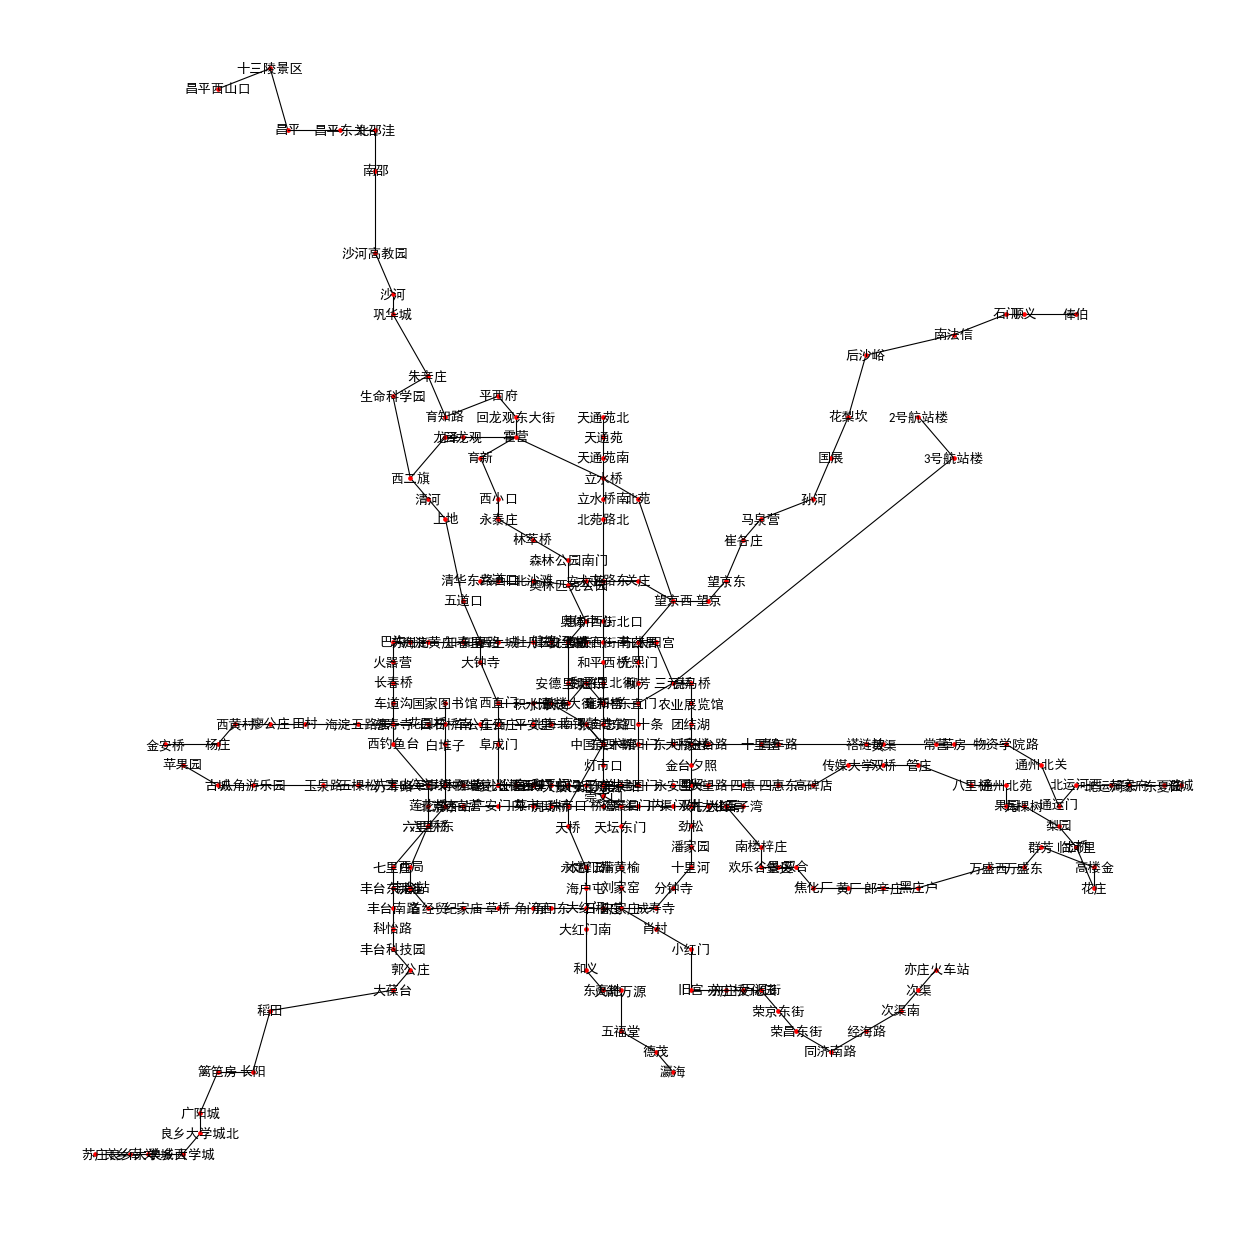

In [70]:
subways_connection = build_connection()
subways_connection_graph = nx.Graph(subways_connection)
plt.figure(figsize=(15, 15), dpi=80)
nx.draw(subways_connection_graph,subways_line,with_labels=True,node_size=10)
plt.savefig("graph.png", dpi=250)
plt.show()

 ### 3. Build the search agent

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [66]:
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                p = ''
                n = 0
                for i in new_path:
                    n = n+1
                    p = p+i+'->'
                       
                print (p[:-2])
        visited.add(froniter)

In [69]:
search_1(subways_connection,"稻田","苹果园")

稻田->大葆台->郭公庄->丰台科技园->科怡路->丰台南路->丰台东大街->七里庄->六里桥->莲花桥->公主坟->万寿路->五棵松->玉泉路->八宝山->八角游乐园->古城->苹果园


### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 